<h3>1.1 EDA</h3>
<h3>Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?</h3>
<p>
För att ta reda på hur många som har hjärt-kärlsjukdomar måste vi importera data samt sortera efter frågeställningen.
Det går lätt att göra med hjälp av Panda
</p>

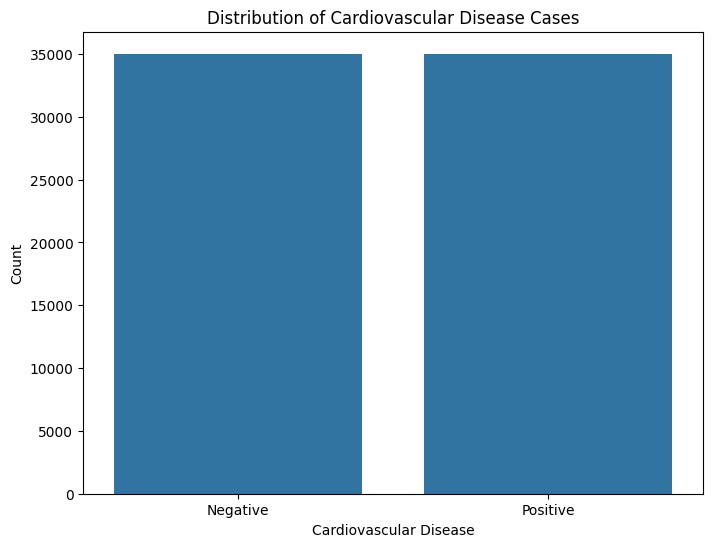

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/cardio_train.csv", sep=';')

df.head()

cardio_counts = df['cardio'].value_counts()

cardio_counts

plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease Cases')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

<p>
Med hjälp av sorteringen kan vi tydligt se att 50% av alla i datan är positiva / negativa för hjärt-kärlsjukdomar.
</p>
<h3>Hur stor andel har normala, över normala och långt över normala kolesterolvärden?</h3>

Percentage with normal cholesterol levels: 74.83571428571429 %
Percentage with above-normal cholesterol levels: 13.641428571428571 %
Percentage with far-above-normal cholesterol levels: 11.522857142857143 %


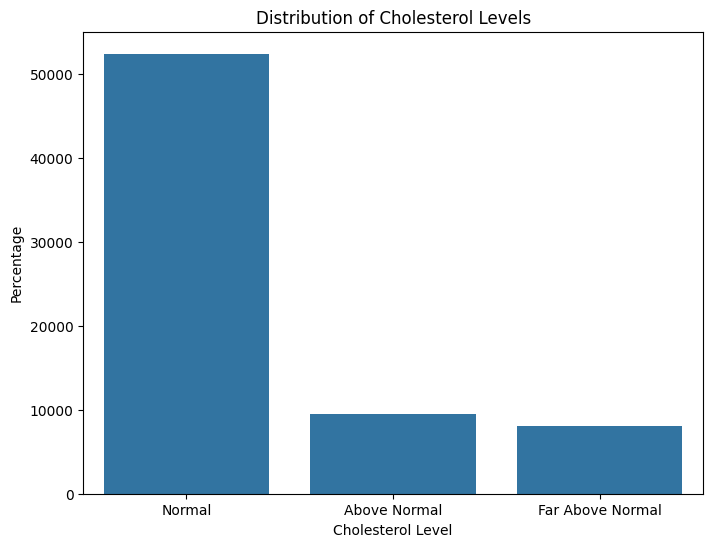

In [2]:
cholesterol_counts = df['cholesterol'].value_counts(normalize=True) * 100

# Print out the percentages
print("Percentage with normal cholesterol levels:", cholesterol_counts[1], "%")
print("Percentage with above-normal cholesterol levels:", cholesterol_counts[2], "%")
print("Percentage with far-above-normal cholesterol levels:", cholesterol_counts[3], "%")

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cholesterol', data=df, order=[1, 2, 3])
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2], ['Normal', 'Above Normal', 'Far Above Normal'])
plt.show()

<h3>Hur ser ålderfördelningen ut?</h3>

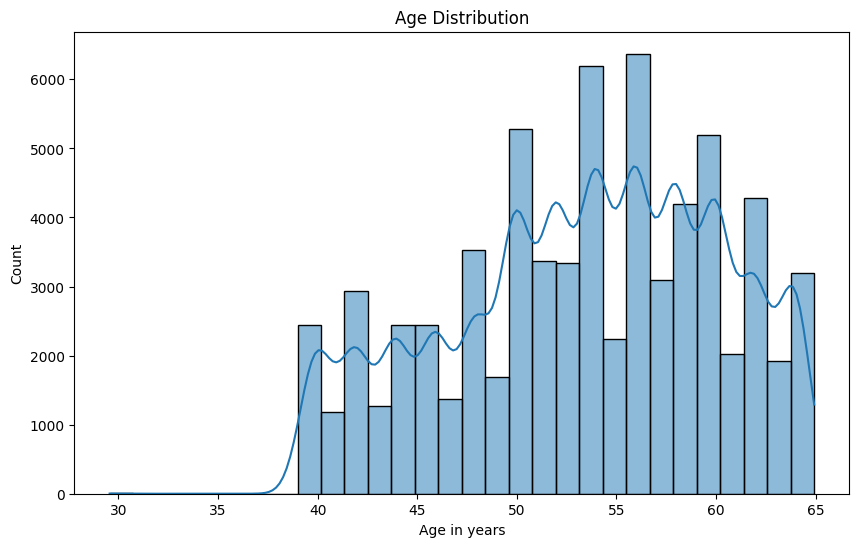

In [3]:
#c) Hur ser  ̊alders fördelningen ut?

df['age_years'] = df['age'] / 365.25


plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age in years')
plt.ylabel('Count')
plt.show()

<p>Man ser tydligt i diagramet att nästan alla i datan är emellan 40-65 år gammla.</p>

<h3>Hur stor andel röker?</h3>

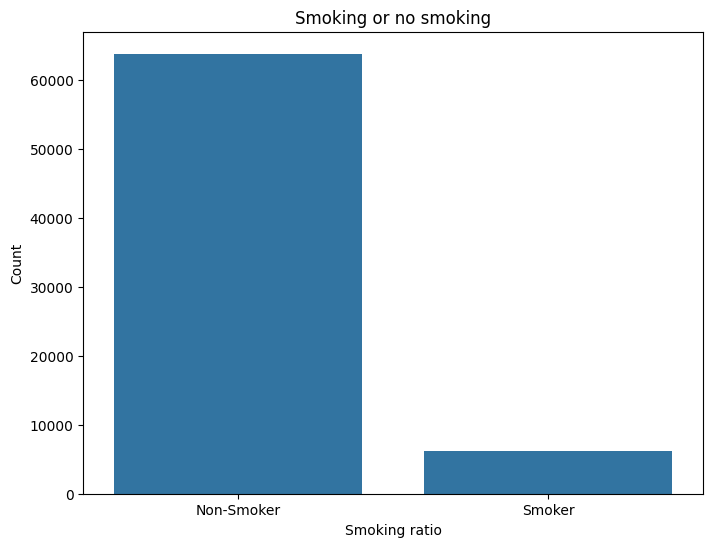

Det finns 6169 rökare i datan


In [11]:
df.head()

smoke_counts = df['smoke'].value_counts()

smoke_counts

plt.figure(figsize=(8, 6))
sns.countplot(x='smoke', data=df)
plt.title('Smoking or no smoking')
plt.xlabel('Smoking ratio')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

print(f"Det finns {smoke_counts[1]} rökare i datan")

<h3>Hur viktfördelingen och längfördelningen ser ut?</h3>

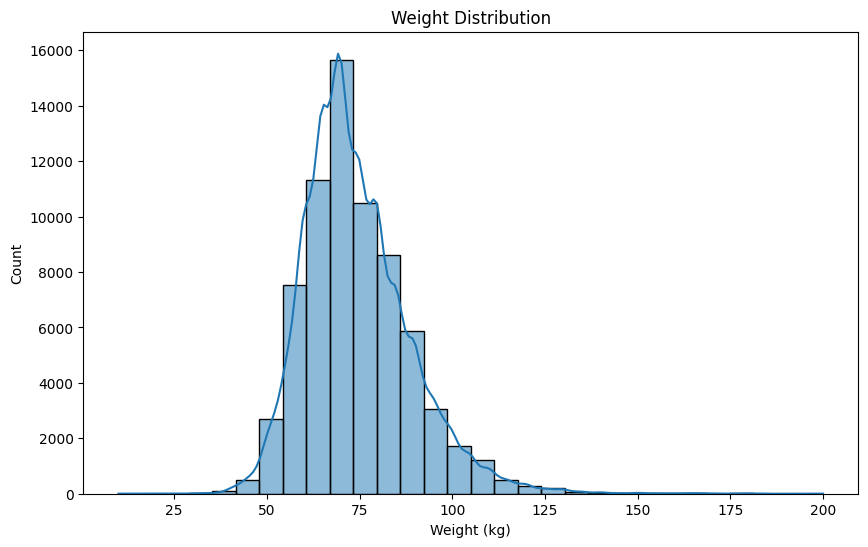

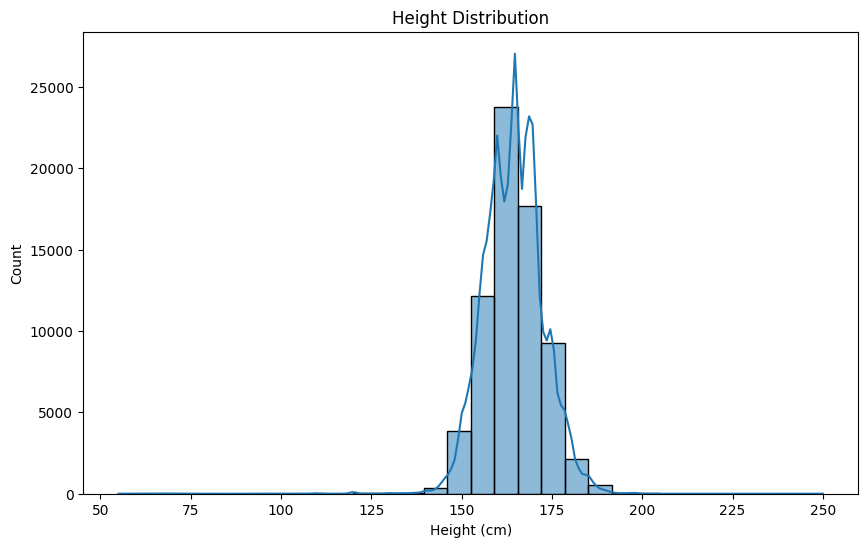

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=30, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['height'], bins=30, kde=True)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

<h3>Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?</h3>

Percentage of women with cardiovascular disease: 49.67274324621129 %
Percentage of men with cardiovascular disease: 50.52308949734369 %


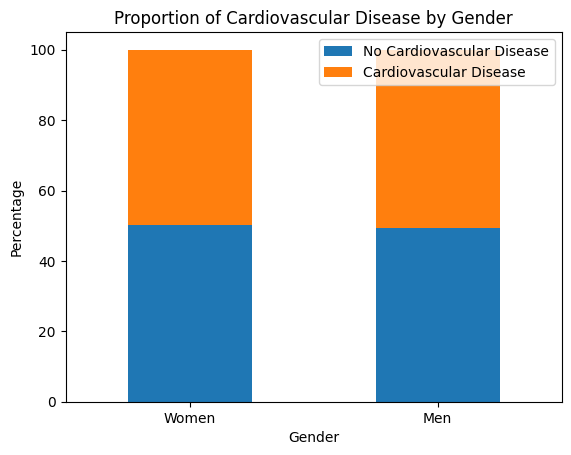

In [13]:
cardio_gender = df.groupby('gender')['cardio'].value_counts(normalize=True).unstack() * 100


print("Percentage of women with cardiovascular disease:", cardio_gender.loc[1, 1], "%")
print("Percentage of men with cardiovascular disease:", cardio_gender.loc[2, 1], "%")


cardio_gender.plot(kind='bar', stacked=True)
plt.title('Proportion of Cardiovascular Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Women', 'Men'], rotation=0)
plt.legend(['No Cardiovascular Disease', 'Cardiovascular Disease'], loc='upper right')
plt.show()

#Skriv något vettigt här vetja

<h3>1.2 Modelldesign</h3>
<p>Vi har gjort en heatmap över datan för att visa olika korrelationer</p>

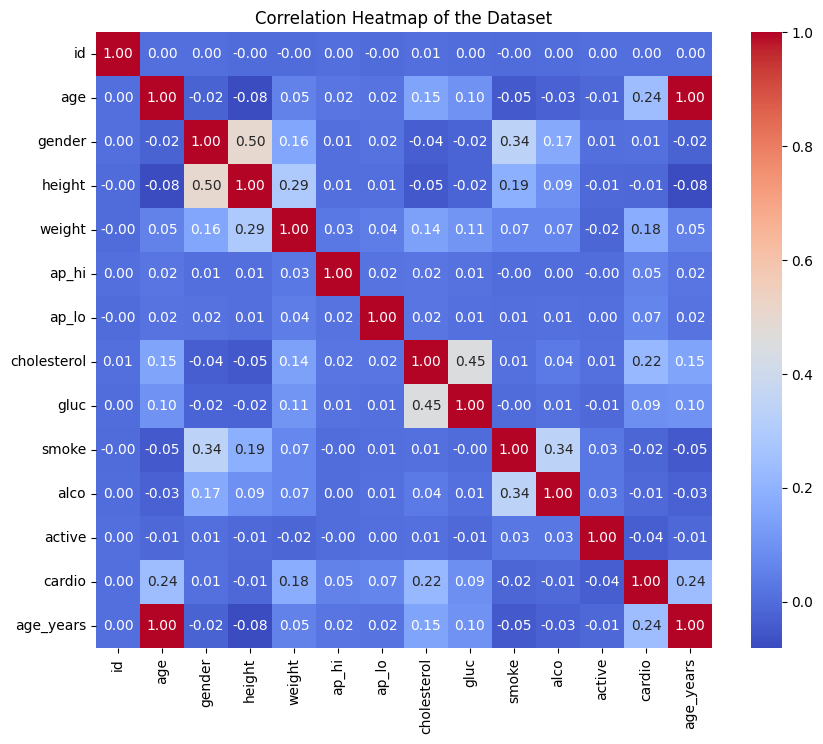

In [16]:


# Calculate the correlation matrix
corr_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of the Dataset')
plt.show()

<h3>Sammanfattning av heatmap</h3>
<p>
Det första vi kollar på är vad det är som påverkar cardio parametern.<br>
1. Åldern med 0.24<br>
2. Kolestrol med 0.22<br>
3. Vikten med 0.18<br>
Men andra intressanta fynd är att gluc påverkar kolestrol med 0.45 vilket är en av bidragarna till hjärtkärlsjukdomar.<br>
De andra parametrarna har väldigt liten påverkan ifall någon har en hjärtkärlsjukdom eller inte.<br>
Samt att alkohol och rökning nästan går hand i hand med en korrelation på 0.34<br>
</p>

<h3>1.2.1 Feature Engineering</h3>